<a href="https://colab.research.google.com/github/Theivaprakasham/Projects/blob/main/Bloodcell%20Classification%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1
Use the pretrained Inception model. Print the summary of the architecture. What is the
advantage of Inception architecture?

In [ ]:
#Let us import required basic libraries
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np

In [ ]:
!wget "https://dl.dropboxusercontent.com/s/5eglqi59a9trk0r/Dataset.zip"
!unzip "/content/Dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__5_4515.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__4_6922.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__12_9564.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__1_3955.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__7_5121.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__8_3771.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__9_6938.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__6_2590.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__9_1592.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__2_4695.jpeg  
  inflating: Dataset/__MACOSX/Blood_Cell_Images/images/TRAIN/MONOCYTE/.__11_27

#### Loading and preparing the dataset

In [ ]:
train = []
y_train = []
one = r'/content/Dataset/Blood_Cell_Images/images/TRAIN/EOSINOPHIL'      
for filename in os.listdir(one):
        y_train.append(0)
        img = cv2.imread(os.path.join(one,filename))
        if img is not None:
            train.append(img)
two = r'/content/Dataset/Blood_Cell_Images/images/TRAIN/LYMPHOCYTE'
for filename in os.listdir(two):
        y_train.append(1)
        img = cv2.imread(os.path.join(two,filename))
        if img is not None:
            train.append(img)
three = r'/content/Dataset/Blood_Cell_Images/images/TRAIN/MONOCYTE'
for filename in os.listdir(three):
        y_train.append(2)
        img = cv2.imread(os.path.join(three,filename))
        if img is not None:
            train.append(img)
four = r'//content/Dataset/Blood_Cell_Images/images/TRAIN/NEUTROPHIL'
for filename in os.listdir(four):
        y_train.append(3)
        img = cv2.imread(os.path.join(four,filename))
        if img is not None:
            train.append(img)
train = np.array(train)
y_train = np.array(y_train)
train.shape,y_train.shape

((9957, 240, 320, 3), (9957,))

In [ ]:
one = r'/content/Dataset/Blood_Cell_Images/images/TEST/EOSINOPHIL'      
two = r'/content/Dataset/Blood_Cell_Images/images/TEST/LYMPHOCYTE'
three = r'/content/Dataset/Blood_Cell_Images/images/TEST/MONOCYTE'
four = r'/content/Dataset/Blood_Cell_Images/images/TEST/NEUTROPHIL'

In [ ]:
test = []
y_test = []
for filename in os.listdir(one):
        y_test.append(0)
        img = cv2.imread(os.path.join(one,filename))
        if img is not None:
            test.append(img)
for filename in os.listdir(two):
        y_test.append(1)
        img = cv2.imread(os.path.join(two,filename))
        if img is not None:
            test.append(img)
for filename in os.listdir(three):
        y_test.append(2)
        img = cv2.imread(os.path.join(three,filename))
        if img is not None:
            test.append(img)
for filename in os.listdir(four):
        y_test.append(3)
        img = cv2.imread(os.path.join(four,filename))
        if img is not None:
            test.append(img)
test = np.array(test)
y_test = np.array(y_test)
test.shape

(2487, 240, 320, 3)

In [ ]:
one = r'/content/Dataset/Blood_Cell_Images/images/VALIDATION/EOSINOPHIL'      
two = r'/content/Dataset/Blood_Cell_Images/images/VALIDATION/LYMPHOCYTE'
three = r'/content/Dataset/Blood_Cell_Images/images/VALIDATION/MONOCYTE'
four = r'/content/Dataset/Blood_Cell_Images/images/VALIDATION/NEUTROPHIL'

In [ ]:
valid = []
y_valid = []
for filename in os.listdir(one):
        y_valid.append(0)
        img = cv2.imread(os.path.join(one,filename))
        if img is not None:
            valid.append(img)
for filename in os.listdir(two):
        y_valid.append(1)
        img = cv2.imread(os.path.join(two,filename))
        if img is not None:
            valid.append(img)
for filename in os.listdir(three):
        y_valid.append(2)
        img = cv2.imread(os.path.join(three,filename))
        if img is not None:
            valid.append(img)
for filename in os.listdir(four):
    
        y_valid.append(3)
        img = cv2.imread(os.path.join(four,filename))
        if img is not None:
            valid.append(img)
valid = np.array(valid)
y_valid = np.array(y_valid)
valid.shape

(71, 240, 320, 3)

In [ ]:
train = np.resize(train,(len(train),128,128,3))
test = np.resize(test,(len(test),128,128,3))
valis = np.resize(valid,(len(valid),128,128,3))
train.shape

(9957, 128, 128, 3)

#### Now we'll load the base Inception model

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
inc_model = InceptionV3(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

In [ ]:
inc_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 63, 63, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 63, 63, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

#### Advantage of Inception Architecture

*The module basically acts as multiple convolution filters, that are applied to the same input, with some pooling. The results are then concatenated. This allows the model to take advantage of multi-level feature extraction . For instance, it extracts general (5x5) and local (1x1) features at the same time.*

*Using multiple features from multiple filters improve the performance of the network. Other than that, there is another fact that makes the inception architecture better than others. All the architectures prior to inception, performed convolution on the spatial and channel wise domain together. By performing the 1x1 convolution, the inception block is doing cross-channel correlations, ignoring the spatial dimensions. This is followed by cross-spatial and cross-channel correlations via the 3x3 and 5x5 filters.*

*The Inception Module is based on a pattern recognition network which mimics the animal visual cortex. After presenting several examples of images, the network gets used to small details, middle sized features or almost whole images if they come up very often. Each layer of the deep network reinforces some features it thinks is there and passes on to the next. If it has been trained to recognize faces, the first layer detects edges, the second overall design, the third eyes, mouth, nose, the fourth the face, the fifth the mood, for instance.*

## Question 2
Apply the transfer learning concept using the pretrained Inception architecture to classify the
given dataset. Come up with your own model parameters.

In [ ]:
for layer in inc_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import models, optimizers
model = models.Sequential()
model.add(inc_model)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation = 'softmax'))
    

#x = layers.Flatten()(base_model.output)
#x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
#x = layers.Dense(4, activation='sigmoid')(x)

#model = tf.keras.models.Model(inc_model.input, x)
model.summary()
#model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 4100      
Total params: 30,196,516
Trainable params: 30,162,084
Non-trainable params: 34,432
_________________________________________________________________


In [ ]:
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)
y_test = y_test.reshape(len(y_test),1)

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])
train = model.fit(train, y_train,
              batch_size=64,
              epochs=5,
              validation_data=(valid, y_valid))

Epoch 1/5
156/156 [==============================] - ETA: 0s - loss: 1.4100 - acc: 0.2501WARNING:tensorflow:Model was constructed with shape (None, 128, 128, 3) for input Tensor("inception_v3_input_2:0", shape=(None, 128, 128, 3), dtype=float32), but it was called on an input with incompatible shape (None, 240, 320, 3).


ValueError: in user code:

    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_4 is incompatible with the layer: expected axis -1 of input shape to have value 8192 but received input with shape [None, 98304]


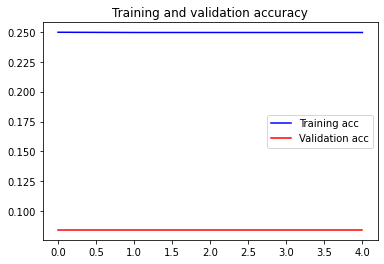

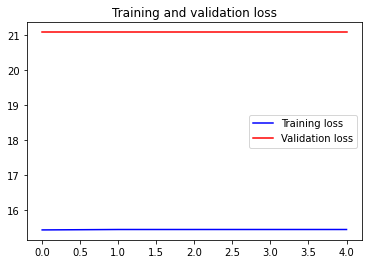

In [ ]:

# Plot the accuracy and loss curves
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_pred = model.predict(test)

In [ ]:
y = []
for i in y_pred:
    for j in range(0,len(i)):
        if i[j] == 1:
            y.append(j)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
confusion_matrix(y_test,y)

array([[  0, 623,   0,   0],
       [  0, 620,   0,   0],
       [  0, 620,   0,   0],
       [  0, 624,   0,   0]], dtype=int64)

In [ ]:
print(classification_report(y_test,y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       623
           1       0.25      1.00      0.40       620
           2       0.00      0.00      0.00       620
           3       0.00      0.00      0.00       624

    accuracy                           0.25      2487
   macro avg       0.06      0.25      0.10      2487
weighted avg       0.06      0.25      0.10      2487



c:\users\hp\anaconda3\envs\rohit\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\anaconda3\envs\rohit\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\anaconda3\envs\rohit\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train.shape

(9957, 128, 128, 3)